In [2]:
%pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------- ----------- 8.1/11.3 MB 42.1 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 35.5 MB/s  0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ----------------------

In [34]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 32.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 28.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.9 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 12.8 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------ --------------------------------- 1.0/7.0 MB 5.6 MB/s eta 0:00:02
   ---------------- ----------------------- 2.9/7.0 MB 6.7 MB/s eta 0:00:01
   --------------------------- ------------ 4.7/7.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 7.8 MB/s  0:00:00
Using c

In [37]:
import numpy as np
import pandas as pd
from scipy .stats import *
import matplotlib.pyplot as plt

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df = pd.read_csv("score.csv")
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [ ]:
# 열의 형태
df.shape

(400, 1)

In [ ]:
# 평균
sum(df["score"]) / len(df["score"])

69.53

In [15]:
# 평균 간단하게
np.mean(df)

np.float64(69.53)

In [ ]:
# 조화 평균
data = np.array(df)
len(data) / np.sum(1 / data)

np.float64(66.07508147696365)

In [ ]:
# 조화 평균 간단하게
hmean(df)

array([66.07508148])

In [ ]:
# 중앙값 (중위값)
sorted_scores = np.sort(df["score"])
n = len(sorted_scores)
# 400개 짝수임으로
if n % 2 == 0:
    x1 = sorted_scores[n // 2 - 1]
    x2 = sorted_scores[n // 2]

    median = (x1 + x2) / 2 
# 홀수의 경우도 알아야 하니깐    
else:
    median = sorted_scores[(n+1) // 2 - 1] 
median   

np.float64(69.0)

In [13]:
# 중앙값 간단하게 출력
np.median(df["score"])
df["score"].median()

np.float64(69.0)

np.float64(69.0)

In [ ]:
# 이상치 추가 할 경우에 평균값과 중위값의 변화 체크
df = np.append(df, 10**10)
np.mean(df), np.median(df)

(np.float64(24937725.216957606), np.float64(69.0))

In [18]:
# 절사 평균 (가장 높은이와 낮은이의 0.2%를 제외한)
trim_mean(df, 0.2)

np.float64(69.81742738589212)

In [ ]:
# 최빈값(최대빈도수)
pd.Series(df).value_counts()

68             16
76             14
63             14
61             13
78             13
               ..
40              1
31              1
29              1
53              1
10000000000     1
Name: count, Length: 65, dtype: int64

In [ ]:
# 최빈값 : 68
pd.Series(df).value_counts().index[0]

np.int64(68)

In [33]:
# 최소값, 최대값
np.min(df), np.max(df)
sorted(df)[0], sorted(df)[-1]

(np.int64(23), np.int64(10000000000))

(np.int64(23), np.int64(10000000000))

In [35]:
# 백분위수
# 제 1사분위수 (하사분위수 Q1)
np.percentile(data, 25)
# 제 2사분위수 (중위수 Q2)
np.percentile(data, 50)
# 제 3사분위수 (상사분위수 Q3)
np.percentile(data, 75)

np.float64(60.0)

np.float64(69.0)

np.float64(80.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5e915c490>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5e9168450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5e915aad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5e9169650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5e9169f10>],
 'means': []}

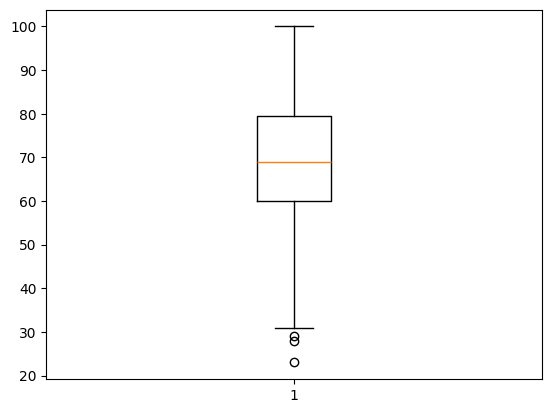

In [42]:
# 그래프를 위한 이상치 제거
df = df[:-1]
# Boxplot
plt.boxplot(df)

In [43]:
# 표본데이터 기술통계량
describe(df)

DescribeResult(nobs=np.int64(399), minmax=(np.int64(23), np.int64(100)), mean=np.float64(69.49122807017544), variance=np.float64(207.10482235740102), skewness=np.float64(-0.19235908370881136), kurtosis=np.float64(-0.22707587062562018))

In [47]:
np.max(df) - np.min(df)
np.ptp(data)

np.int64(77)

np.int64(77)

In [49]:
# Q3 ~ Q1
np.quantile(df, 0.75) - np.quantile(df, 0.25)
iqr(df)

np.float64(19.5)

np.float64(19.5)

In [50]:
# 편차
data - np.mean(df)

array([[  6.50877193],
       [-14.49122807],
       [ 10.50877193],
       [ 10.50877193],
       [  4.50877193],
       [ -8.49122807],
       [ 11.50877193],
       [  6.50877193],
       [-46.49122807],
       [ 10.50877193],
       [-28.49122807],
       [ 10.50877193],
       [ -1.49122807],
       [ 18.50877193],
       [ -0.49122807],
       [-12.49122807],
       [ -1.49122807],
       [ 16.50877193],
       [  0.50877193],
       [ -1.49122807],
       [ 11.50877193],
       [  3.50877193],
       [  0.50877193],
       [ 20.50877193],
       [ 23.50877193],
       [  9.50877193],
       [ -3.49122807],
       [ 22.50877193],
       [ 18.50877193],
       [ 11.50877193],
       [-17.49122807],
       [  2.50877193],
       [-10.49122807],
       [ -1.49122807],
       [  4.50877193],
       [  2.50877193],
       [ -6.49122807],
       [ 19.50877193],
       [-24.49122807],
       [ 11.50877193],
       [-27.49122807],
       [  6.50877193],
       [-12.49122807],
       [ 13

In [52]:
# 편차의 합 = 0
%precision 5
(df - np.mean(df)).sum()

'%.5f'

0.00000

In [53]:
# 표본분산
np.var(df, ddof=1)

# 모분산
np.var(df)
np.array(df).var()
pd.Series(df).var(ddof=0)

207.10482

206.58576

206.58576

206.58576

In [54]:
# 표준편차
np.std(df, ddof=1)

np.std(df)
np.array(df).std()
pd.Series(df).std(ddof=0)

14.39114

14.37309

14.37309

14.37309

<Axes: >

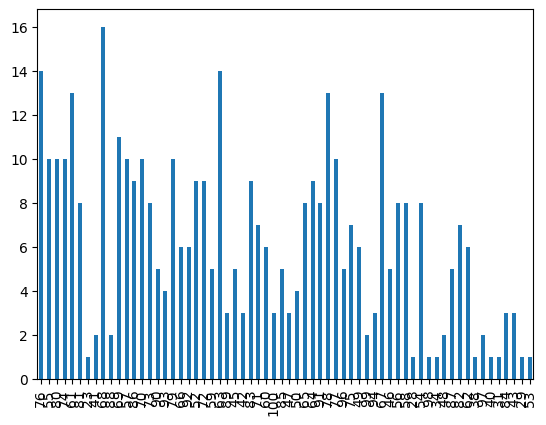

In [57]:
pd.Series(df).value_counts(sort=False).plot(kind="bar")

In [ ]:
# 정규분포 기준의 차이값
skew(df)

-0.19236

In [59]:
# 첨도
kurtosis(df)

-0.22708

In [60]:
freq, _ = np.histogram(df, bins=10, range=(0, 100))
freq

array([  0,   0,   3,   3,  30,  63, 102,  98,  61,  39])

In [61]:
freq_class = [f"{i} ~ {i  + 10}" for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({"frequency" : freq}, index=freq_class)
freq_dist_df

,frequency
0 ~ 10,0
10 ~ 20,0
20 ~ 30,3
30 ~ 40,3
40 ~ 50,30
50 ~ 60,63
60 ~ 70,102
70 ~ 80,98
80 ~ 90,61
90 ~ 100,39


In [62]:
# 상대 도수
rel_freq = freq / freq.sum()
rel_freq

array([0.     , 0.     , 0.00752, 0.00752, 0.07519, 0.15789, 0.25564,
       0.24561, 0.15288, 0.09774])

In [63]:
# 누적 상대 도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.     , 0.     , 0.00752, 0.01504, 0.09023, 0.24812, 0.50376,
       0.74937, 0.90226, 1.     ])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  1.,  9., 13., 12.,
        28., 31., 39., 36., 44., 34., 47., 34., 22., 18., 13., 13.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

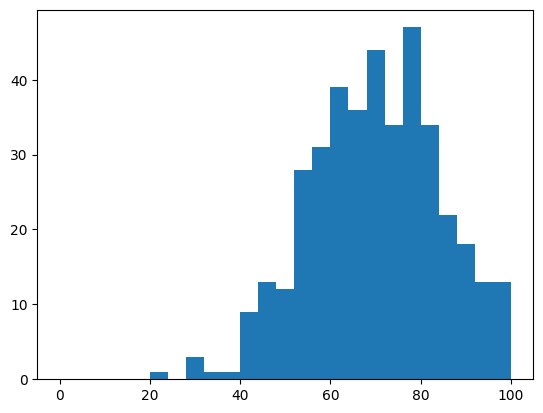

In [65]:
plt.hist(df, bins=25, range=(0, 100))

(array([  0.,   0.,   3.,   3.,  30.,  63., 102.,  98.,  61.,  39.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

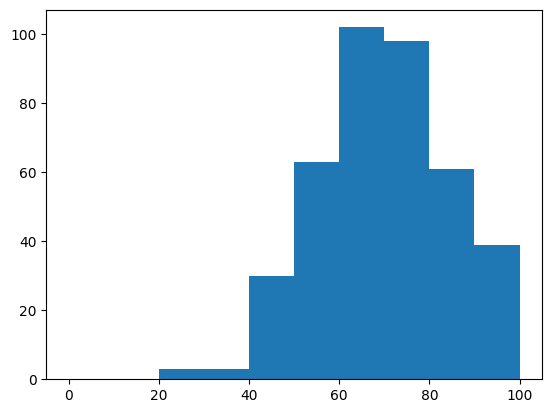

In [66]:
plt.hist(df, bins=10, range=(0, 100))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  2.,  1.,  0.,  1.,  0.,  1.,  3.,  6.,  5.,  8.,  8.,  4.,
        10., 18., 18., 13., 19., 20., 17., 19., 27., 17., 17., 17., 24.,
        23., 18., 16.,  8., 14.,  5., 13., 10.,  3.,  7.,  6.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 50 artists>)

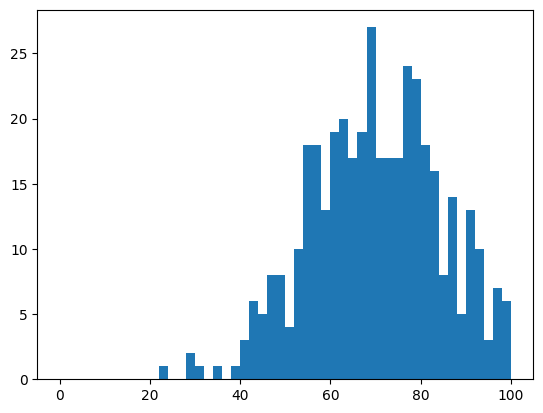

In [68]:
plt.hist(df, bins=50, range=(0, 100))

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5ea58a950>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5ea589490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5ea58b150>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5ea57b290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5ea5799d0>],
 'means': []}

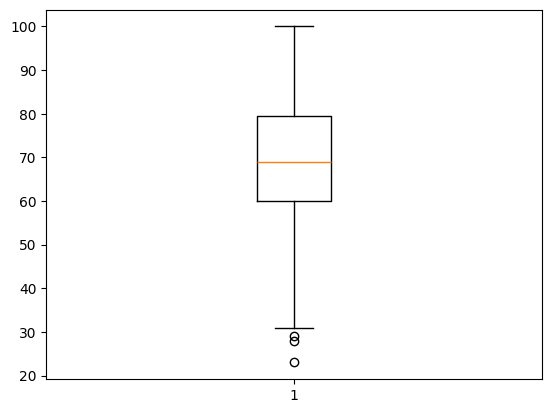

In [69]:
plt.boxplot(df, label=["score"])